In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
import matplotlib.dates as mdates

## Pulling the data from online

In [49]:
data = pd.read_csv('https://github.com/nytimes/covid-19-data/raw/master/us-counties.csv')

In [50]:
data.sample(10)

,date,county,state,fips,cases,deaths
383828,2020-07-30,Knott,Kentucky,21119.0,34,1
57448,2020-04-14,Assumption,Louisiana,22007.0,123,1
191684,2020-05-30,Butler,Kentucky,21031.0,228,13
81026,2020-04-22,Newport News city,Virginia,51700.0,101,6
358446,2020-07-22,Marshall,Minnesota,27089.0,23,0
181492,2020-05-26,Ozaukee,Wisconsin,55089.0,138,11
154003,2020-05-17,Northumberland,Virginia,51133.0,18,1
318399,2020-07-09,Morgan,Utah,49029.0,26,0
430389,2020-08-13,Henry,Tennessee,47079.0,307,1
352207,2020-07-20,Henry,Missouri,29083.0,41,3


In [51]:
pops = pd.read_excel('https://www2.census.gov/programs-surveys/popest/tables/2010-2019/counties/totals/co-est2019-annres.xlsx', header=3)


In [52]:
pops.head()

,Unnamed: 0,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,United States,308745538.0,308758105.0,309321666.0,311556874.0,313830990.0,315993715.0,318301008.0,320635163.0,322941311.0,324985539.0,326687501.0,328239523.0
1,".Autauga County, Alabama",54571.0,54597.0,54773.0,55227.0,54954.0,54727.0,54893.0,54864.0,55243.0,55390.0,55533.0,55869.0
2,".Baldwin County, Alabama",182265.0,182265.0,183112.0,186558.0,190145.0,194885.0,199183.0,202939.0,207601.0,212521.0,217855.0,223234.0
3,".Barbour County, Alabama",27457.0,27455.0,27327.0,27341.0,27169.0,26937.0,26755.0,26283.0,25806.0,25157.0,24872.0,24686.0
4,".Bibb County, Alabama",22915.0,22915.0,22870.0,22745.0,22667.0,22521.0,22553.0,22566.0,22586.0,22550.0,22367.0,22394.0


## Adding Rolling Averages for Each of the Counties

In [53]:
counties = ['Albemarle','Charlottesville city']
frame_list = []
county_data = pd.DataFrame(columns=['date','county','state','fips','cases', 'deaths'])
for i in range(len(counties)):
    county = counties[i]
    new_data = data[data.county == county]
    new_data['new_cases'] = new_data.cases.diff()
    new_data['rolling_avg'] = new_data.new_cases.rolling(window=7, min_periods=7).mean().round(2)
    frame_list.append(new_data)
full_data = pd.concat(frame_list)
full_data.fillna(0, inplace=True)
full_data.sample(10)

C:\Users\Jason\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Jason\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,county,state,fips,cases,deaths,new_cases,rolling_avg
227422,2020-06-10,Charlottesville city,Virginia,51540.0,142,3,1.0,2.00
172095,2020-05-23,Albemarle,Virginia,51003.0,143,5,1.0,1.00
9371,2020-03-23,Charlottesville city,Virginia,51540.0,4,0,0.0,0.00
230527,2020-06-11,Charlottesville city,Virginia,51540.0,144,3,2.0,1.86
129933,2020-05-09,Albemarle,Virginia,51003.0,119,4,3.0,2.00
233634,2020-06-12,Charlottesville city,Virginia,51540.0,146,3,2.0,2.14
302581,2020-07-04,Albemarle,Virginia,51003.0,456,9,36.0,10.57
327982,2020-07-12,Albemarle,Virginia,51003.0,552,10,19.0,13.14
30523,2020-04-03,Charlottesville city,Virginia,51540.0,17,0,0.0,0.86
19467,2020-03-29,Charlottesville city,Virginia,51540.0,12,0,0.0,1.14


## Population Clean-Up

In [54]:
pops = pops[['Unnamed: 0', 2019]]
pops.head()

,Unnamed: 0,2019
0,United States,328239523.0
1,".Autauga County, Alabama",55869.0
2,".Baldwin County, Alabama",223234.0
3,".Barbour County, Alabama",24686.0
4,".Bibb County, Alabama",22394.0


In [55]:
pops.drop(range(3143,3149), axis=0, inplace=True) #dropping the notes at the end 
pops.drop(0, axis=0, inplace=True) #dropping the US as a whole 
pops.rename({'Unnamed: 0': 'Original_County', 2019: 'Population'}, axis=1, inplace=True) #renaming the columns of the DF
pops.reset_index(drop=True, inplace=True) #resetting the index

In [56]:
pops.head()

,Original_County,Population
0,".Autauga County, Alabama",55869.0
1,".Baldwin County, Alabama",223234.0
2,".Barbour County, Alabama",24686.0
3,".Bibb County, Alabama",22394.0
4,".Blount County, Alabama",57826.0


In [57]:
pops.tail()

,Original_County,Population
3137,".Sweetwater County, Wyoming",42343.0
3138,".Teton County, Wyoming",23464.0
3139,".Uinta County, Wyoming",20226.0
3140,".Washakie County, Wyoming",7805.0
3141,".Weston County, Wyoming",6927.0


In [58]:
#Putting the county and state into separate columns
pops[['county','state']] = pops.Original_County.str.split(',', expand=True)
pops.county = pops.county.str.strip('.').str.replace('County','').str.strip() #stripping out the leading period and the word "County"
pops.state = pops.state.str.strip()
pops.sample(10)

,Original_County,Population,county,state
690,".Wayne County, Illinois",16215.0,Wayne,Illinois
2372,".Charles Mix County, South Dakota",9292.0,Charles Mix,South Dakota
1630,".Musselshell County, Montana",4633.0,Musselshell,Montana
279,".Larimer County, Colorado",356899.0,Larimer,Colorado
632,".Iroquois County, Illinois",27114.0,Iroquois,Illinois
293,".Pitkin County, Colorado",17767.0,Pitkin,Colorado
1145,".Madison Parish, Louisiana",10951.0,Madison Parish,Louisiana
1024,".Elliott County, Kentucky",7517.0,Elliott,Kentucky
1776,".Burlington County, New Jersey",445349.0,Burlington,New Jersey
2317,".Aiken County, South Carolina",170872.0,Aiken,South Carolina


In [59]:
final = pd.merge(full_data,pops, on=['county', 'state'], how='left')
final['cases_per_100k'] = final.rolling_avg / (final.Population / 100000)
final.date = pd.to_datetime(final.date)

## Past 10 Days of Raw Data

In [60]:
final[final.county=='Albemarle'].tail(10)

,date,county,state,fips,cases,deaths,new_cases,rolling_avg,Original_County,Population,cases_per_100k
137,2020-08-05,Albemarle,Virginia,51003.0,791,16,1.0,9.57,".Albemarle County, Virginia",109330.0,8.753316
138,2020-08-06,Albemarle,Virginia,51003.0,798,16,7.0,9.29,".Albemarle County, Virginia",109330.0,8.497210
139,2020-08-07,Albemarle,Virginia,51003.0,817,16,19.0,11.71,".Albemarle County, Virginia",109330.0,10.710692
140,2020-08-08,Albemarle,Virginia,51003.0,833,16,16.0,13.14,".Albemarle County, Virginia",109330.0,12.018659
141,2020-08-09,Albemarle,Virginia,51003.0,838,16,5.0,11.43,".Albemarle County, Virginia",109330.0,10.454587
142,2020-08-10,Albemarle,Virginia,51003.0,842,16,4.0,9.57,".Albemarle County, Virginia",109330.0,8.753316
143,2020-08-11,Albemarle,Virginia,51003.0,848,16,6.0,8.29,".Albemarle County, Virginia",109330.0,7.582548
144,2020-08-12,Albemarle,Virginia,51003.0,856,16,8.0,9.29,".Albemarle County, Virginia",109330.0,8.497210
145,2020-08-13,Albemarle,Virginia,51003.0,869,16,13.0,10.14,".Albemarle County, Virginia",109330.0,9.274673
146,2020-08-14,Albemarle,Virginia,51003.0,883,16,14.0,9.43,".Albemarle County, Virginia",109330.0,8.625263


In [61]:
final[final.county=='Charlottesville city'].tail(10)

,date,county,state,fips,cases,deaths,new_cases,rolling_avg,Original_County,Population,cases_per_100k
288,2020-08-05,Charlottesville city,Virginia,51540.0,504,13,0.0,8.71,".Charlottesville city, Virginia",47266.0,18.427622
289,2020-08-06,Charlottesville city,Virginia,51540.0,505,15,1.0,7.71,".Charlottesville city, Virginia",47266.0,16.311937
290,2020-08-07,Charlottesville city,Virginia,51540.0,520,15,15.0,7.71,".Charlottesville city, Virginia",47266.0,16.311937
291,2020-08-08,Charlottesville city,Virginia,51540.0,537,15,17.0,9.43,".Charlottesville city, Virginia",47266.0,19.950916
292,2020-08-09,Charlottesville city,Virginia,51540.0,542,15,5.0,9.00,".Charlottesville city, Virginia",47266.0,19.041171
293,2020-08-10,Charlottesville city,Virginia,51540.0,543,15,1.0,6.86,".Charlottesville city, Virginia",47266.0,14.513604
294,2020-08-11,Charlottesville city,Virginia,51540.0,546,15,3.0,6.00,".Charlottesville city, Virginia",47266.0,12.694114
295,2020-08-12,Charlottesville city,Virginia,51540.0,550,15,4.0,6.57,".Charlottesville city, Virginia",47266.0,13.900055
296,2020-08-13,Charlottesville city,Virginia,51540.0,554,15,4.0,7.00,".Charlottesville city, Virginia",47266.0,14.809800
297,2020-08-14,Charlottesville city,Virginia,51540.0,555,15,1.0,5.00,".Charlottesville city, Virginia",47266.0,10.578428


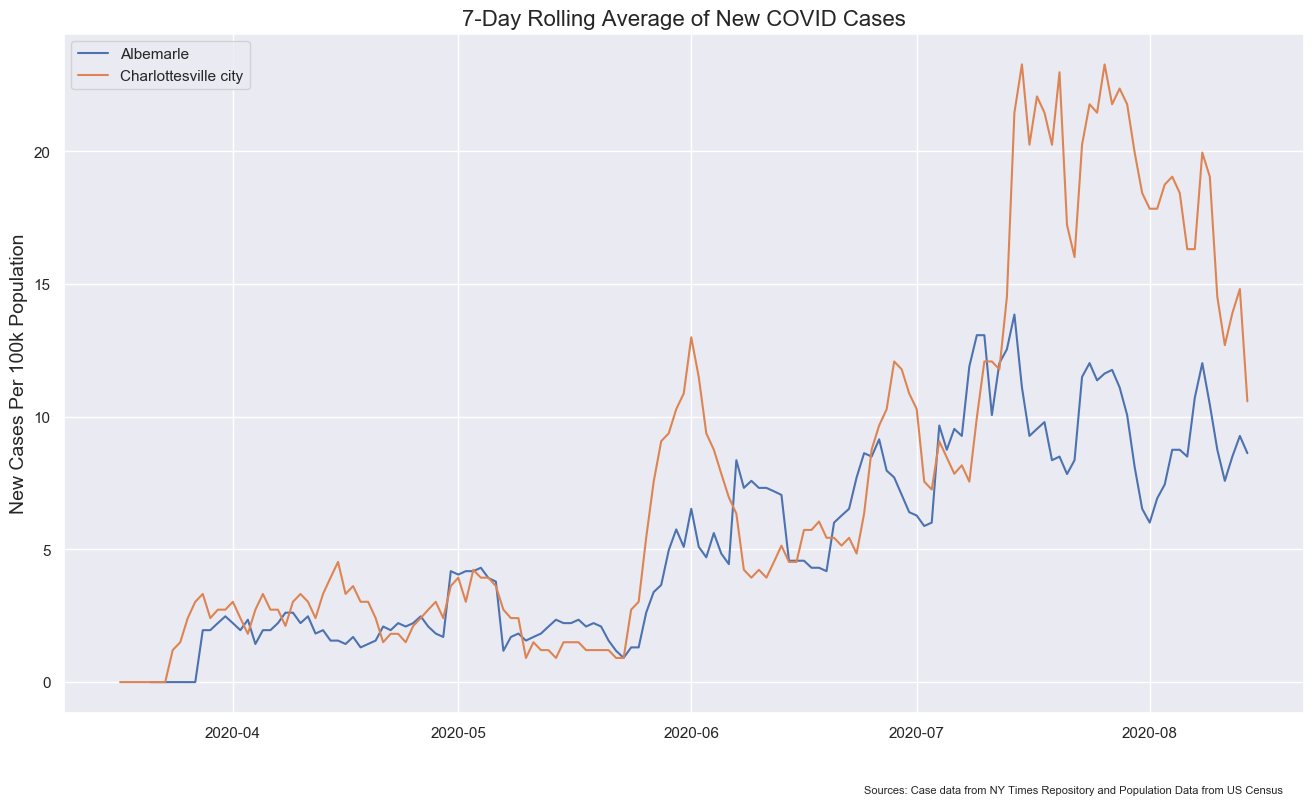

In [63]:
sns.set()
fig, axes = plt.subplots(1, 1,figsize=(16, 9), dpi=100)
plt.plot(final[final.county =='Albemarle'].date, final[final.county =='Albemarle'].cases_per_100k)
plt.plot(final[final.county =='Charlottesville city'].date, final[final.county =='Charlottesville city'].cases_per_100k)
plt.ylabel('New Cases Per 100k Population', fontsize=14)
months = mdates.MonthLocator()  # every month
axes.xaxis.set_major_locator(months)
plt.legend(counties)
plt.title("7-Day Rolling Average of New COVID Cases", fontsize=16)
plt.annotate("Sources: Case data from NY Times Repository and Population Data from US Census", xy=(800,-80), xycoords="axes pixels", fontsize=8)
plt.show()
fig.savefig('C:/Users/Jason/Documents/COVIDcovidplot.png')